# Part 1:  Simple linear regression for one independent variable

In this lab, you will load data, plot data, perform simple mathematical manipulations, and fit a simple linear regression model.  Before doing this lab, you can go through the class demo on simple linear regression for an automobile dataset.  The lab use the Boston housing data set, a widely-used machine learning data set for illustrating basic concepts.  

## Loading the data

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

Each row in the dataset it not a single house -- it corresponds to the average information about homes in a single single [census track](https://en.wikipedia.org/wiki/Census_tract).

In the lab, you will complete all the code marked `TODO`. 

First, complete the following code that uses the `pd.read_csv` command to read the data from the file located at

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [1]:
import pandas as pd
import numpy as np
colnames =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

# TODO:  Complete the code
# df = pd.read_csv(...)
# housing_data = "housing.data"
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,delim_whitespace=True,names=colnames,na_values='?')



Display the first six rows of the data frame

In [2]:
# TODO

# Use head() to show the first nth rows
first_six_rows = df.head(6)
print(first_six_rows)

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33   36.2
5  0.02985   0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21   28.7

[6 rows x 14 columns]


## Basic Manipulations on the Data

What is the shape of the data?  How many attributes are there?  How many samples?
Print a statement of the form:

    num samples=xxx, num attributes=yy

In [3]:
# TODO

# Shape
num_attributes = df.shape[1]
# print(num_attributes)
num_samples = df.shape[0]
# print(type(num_samples))

print('The number of attributes is ' + f'{num_attributes}' + ', and the number of samples is ' + f'{num_samples}')

# Alternatively, could use str() to conver the num into str data type.
# print(str(num_attributes) + "    " + str(num_samples))


The number of attributes is 14, and the number of samples is 506


Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.ndarray` structure.

In [4]:
# TODO
# y = ...

y = np.array(df['PRICE'])
# print(y)

# ndarray data type
print(type(y))

<class 'numpy.ndarray'>


Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!). Print and label your results.

In [5]:
# TODO

mean_house_price = np.mean(y)
print(mean_house_price)
print('The mean house price is ' + f'{round(mean_house_price, 4)}' + " thousands of dollars.")

# fraction = The number of houses that have more than $40K/ the number of all houses
fraction_of_house_above_40k = len(np.where(y > 40)[0])/len(y)*100
# print(type(fraction_of_house_above_40k))
# print(fraction_of_house_above_40k)
print('The fraction of households that are above $40K is ' + str(round(fraction_of_house_above_40k, 3)) + "%.")


22.532806324110677
The mean house price is 22.5328 thousands of dollars.
The fraction of households that are above $40K is 6.126%.


## Visualizing the Data

Load the `matplotlib` package with the following commands.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each census track.

In [7]:
# TODO
# x = ...
x = np.array(df['RM'])
# print(x)
# print(df)


Create a scatter plot of the price vs. the `RM` attribute.  Label the axes with reasonable labels so that someone else can understand the plot.

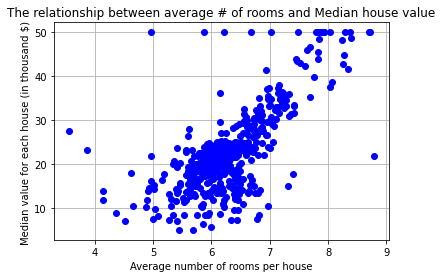

In [8]:
# TODO
plt.title("The relationship between average # of rooms and Median house value") 
# plt.plot(x,y, color = 'blue') only gives lines
plt.plot(x,y, 'bo')
plt.grid(visible = True)
plt.xlabel('Average number of rooms per house') 
plt.ylabel('Median value for each house (in thousand $) ') 
plt.show()

## Fitting a Simple Linear Model

We will write a simple function to perform a linear fit under the squared loss function. Use the formulae given in the class to compute the optimal parameters $\beta_0,\beta_1$ in the linear model $$y =\beta_0 + \beta_1 x$$ as well as the optimal loss $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$.

In [9]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       y = beta0 + beta1*x, 
    The function returns beta0, beta1, and loss, where loss is the sum-of-squares loss of.
    """
    # TODO complete the following code
    # beta0 = ...
    # beta1 = ...
    # loss = ...

    mean_x  = np.mean(x)
    # print(str(mean_x))
    mean_y  = np.mean(y)
    # print(str(mean_y))
    # differences_y = np.mean(y-mean_y)

    differences_squared_y = np.mean((y-mean_y)**2)
    # differences_x = np.mean(x-mean_x)
    differences_squared_x = np.mean((x-mean_x)**2)
    diff_x_y = np.mean((y-mean_y)*(x-mean_x))
    # print(diff, differences_squared_x, differences_squared_y)

    beta1 = diff_x_y/differences_squared_x
    beta0 = mean_y - beta1*mean_x
    loss = (diff_x_y*diff_x_y)/(differences_squared_x*differences_squared_y)

    return beta0, beta1, loss

# fit_linear(x,y)
beta0 , beta1 , loss = fit_linear(x,y)

Using the function `fit_linear` above, print the values `beta0`, `beta1` and `loss` for the linear model of price vs. number of rooms.

In [10]:
# TODO

beta0 , beta1 , loss = fit_linear(x,y)

Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `yp` that are the predicted values for each value in `x`, according to our linear model. Plot as a line, not a scatter plot.

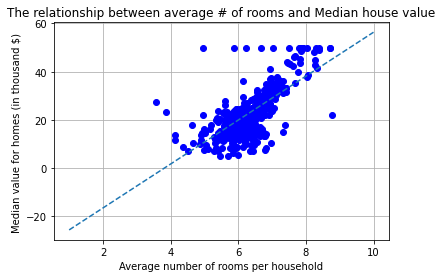

In [11]:
# TODO


xplt = np.array([1, 10])
yplt = beta1*xplt + beta0
plt.title("The relationship between average # of rooms and Median house value")
plt.grid(visible = True)
plt.plot(x,y,'bo')
plt.plot(xplt, yplt,'--')
plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 
plt.show()



# Part 2:  Compare different dependent variables


We next compute the squared loss for all the predictors and output the values in a table. Your table should look like the following, where each entry in the first column is the attribute name and the second column is the squared loss.

    CRIM        XXXXX
    ZN          XXXXX
    INDUS       XXXXX
    ...         ...

You will need to write a loop. One option is to loop over the list of colunm names in the dataframe `df`.

What variable does the best job predicting house price?

In [12]:
# TODO

for i in range(len(colnames)-1):
    var1 , var2 , loss = fit_linear(np.array(df[colnames[i]]),y)
    # print('Colname' + "  Loss")
    print(colnames[i] + "    " + str(round(loss,4)))
    # print(colnames[i] + "       ".join((round(loss,4)))

# return colnames[i] + + f'        {(round(loss,4))}'

CRIM    0.1508
ZN    0.1299
INDUS    0.234
CHAS    0.0307
NOX    0.1826
RM    0.4835
AGE    0.1421
DIS    0.0625
RAD    0.1456
TAX    0.2195
PTRATIO    0.2578
B    0.1112
LSTAT    0.5441


**TODO:** Describe in words the meaning of the most predictive variable for housing price. You might need to do some Googling to figure out what it means. 

I think this question is asking, among all the factors that may affect housing prices, especially including all the variables, or column names in the dataset, which one independent variable (that can be seen as x) will have the most effect on the housing price. 

How we determine the most predictive variables should consider the domain knowlege, subject-area, and our goals for the regression model. Therefore, it varies from people to people. In addition, the methods we use to collect, train, and test data also affect the importance of the model.

I think this is why we do linear regression with different varaibles and see which varibale regarding to the housing price will give a most accurate prediction on housing price. In this case, we just want to focus on one single variable linear regression that will give the most minimised losses among all. 

In this dataset, we are focusing on the number of rooms each house has and how it can predict the house values. But if we have the time, we can also do a similar linear regression study on zip codes, # of bathrooms, area of garden, area of the house in total and see if there is a stronger relationship with the housing price,and conveniently come up with a linear regression model that can minimize the losses. 


# Part 3:  Compare different loss functions

## A Brute force algorithm for squared loss

Your code in `fit_linear` relies on the closed form expressions for the optimal $\beta_0$ and $\beta_1$, which we derived in class. However, if you did not know these formulas, you could have approximately minimized the loss function by brute force searching over a grid of possible values for $\beta_0$ and $\beta_1$. This idea was suggested by a student in our class. 

For example, we could try out all combinations of parameters where $\beta_0$ is in `np.arange(-50,50,1)` and $\beta_1$ is in `np.arange(-10,10,.1)`

Write a function which takes this approach to find a $\beta_0$ and $\beta_1$ which approximately minimize the squared loss: $\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x)^2$

In [13]:
import random
import math

In [14]:

def fit_approx(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the sum-of-squares loss. The min_loss returned is the lost of the best beta0 and beta1 you found.
    """
    # TODO complete the following code
    beta0 = 0
    beta1 = 0
    # min_loss = ...

    min_loss = math.inf
    for i in np.arange(-50, 50, 1.0): # beta0
      for j in np.arange(-10, 10, 0.1): # beta1
        yhat = i + j*x
        curr_loss = np.sum((y - yhat)**2)
        # print(curr_loss)
        if min_loss >= curr_loss:
          min_loss = curr_loss
          beta0 = i
          beta1 = j

    # return curr_loss
    return beta0, beta1, min_loss
    
    # return beta0, beta1, min_loss

In [15]:
y = np.array(df['PRICE'])
x = np.array(df['LSTAT'])

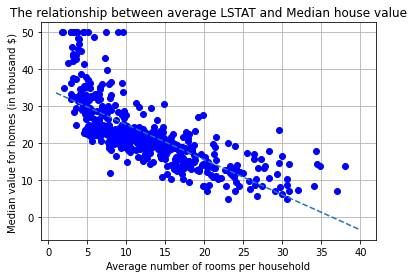

In [16]:
beta0 , beta1 , loss = fit_linear(x,y) # as taught in class

# Graph logic shown here is the same as the one above: 

xplt = np.array([1, 40])
yplt = beta1*xplt + beta0
plt.title("The relationship between average LSTAT and Median house value")
plt.grid(visible = True)
plt.plot(x,y,'bo')
plt.plot(xplt, yplt,'--')
plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 
plt.show()


34.0
-0.9000000000000323
19540.082422999883


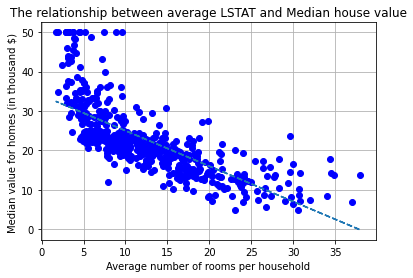

In [17]:
beta0, beta1, min_loss = fit_approx(x,y) # With the randomized combination of beta0 and beta1 and use the squared mean loss 
print(beta0)
print(beta1)
print(min_loss)

# Variables
# One way to do it, using np.array()
# y = np.array(df['PRICE'])
# x = np.array(df['LSTAT'])
# Another way to do it, using .values
y = df['PRICE'].values
x = df['LSTAT'].values

# Plotting y 
yplt = beta1*x + beta0

plt.title("The relationship between average LSTAT and Median house value")
plt.grid(visible = True)

# Just the two variables
plt.plot(x,y,'bo')

# The linear regression 
plt.plot(x, yplt,'--')

# Naming
plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 


plt.show()

Compare the output of `fit_approx` and `fit_linear` with `y` being `PRICE` and `x` being the `LSAT` variable from our dataset. You should do so:
* quantitatively, by printing the loss that each approach achieves
* and visually, by plotting the different fit lines obtained.

## Extending to different loss functions

One benefit of the above approach is that is easily extends to different loss funtions. Write functions which find an approximately optimal $\beta_0$ and $\beta_1$ for
* minimizing the $\ell_1$ (least absolute deviations) loss: $\sum_{i=1}^n |y_i - \beta_0 - \beta_1 x|$ 
* minimizing the $\ell_\infty$ (max) loss: $\max_i |y_i - \beta_0 - \beta_1 x|$


In [18]:
def fit_approx_l1(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the least absolute deviations loss.
    """
    # TODO complete the following code
    beta0 = 0
    beta1 = 0
    min_loss = math.inf

    # y = beta0 + beta1*x

    for i in np.arange(-50, 50, 1.0): # beta0
      for j in np.arange(-10, 10, 0.1): # beta1

      # The only difference between this and the previous one is that here we do the abs values
        yhat = i + j*x
        curr_loss = np.sum(np.abs(y - yhat))
        # print(curr_loss)
        if min_loss >= curr_loss:
          min_loss = curr_loss
          beta0 = i
          beta1 = j

    # return curr_loss
    return beta0, beta1, min_loss

    # min_loss = float("inf")
    # for i in np.arange(-50, 50, 1.0):
    #   for j in np.arange(-10, 10, 0.1):
    #     if min_loss < abs(y - i - j*x):
    #       min_loss = abs(y - i - j*x)
    #       beta0 = i
    #       beta1 = j
    
    # return beta0, beta1, min_loss

31.0
-0.8000000000000327
2163.5600000000027


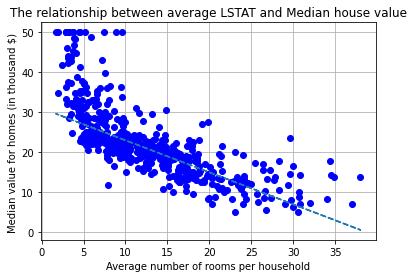

In [19]:
# Plotting data onto a graph

beta0, beta1, min_loss = fit_approx_l1(x, y)
# print(min_loss)
# xplt = np.array([1, 5])
print(beta0)
print(beta1)
print(min_loss)

# variables
y = df['PRICE'].values
x = df['LSTAT'].values

# Graphs
yplt = beta1*x + beta0
plt.title("The relationship between average LSTAT and Median house value")
plt.grid(visible = True)
plt.plot(x,y,'bo')
plt.plot(x, yplt,'--')

# Naming
plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 
plt.show()

In [23]:
def fit_approx_max(x,y):
    """
    Given vectors of data points (x,y), performs an *approximate* fit for the linear model:
       y = beta0 + beta1*x, 
    under the max loss.
    """
    # TODO complete the following code
    beta0 = 0
    beta1 = 0
    min_loss = math.inf

    for i in np.arange(-50, 50, 1.0): # beta0
      for j in np.arange(-10, 10, 0.1): # beta1
        yhat = i + j*x

        # Choosing the max of all the absolute values 
        # For different beta0 and beta1, we will have different abs(y-yhat) at different x points.
        # For each set, there will be a max, and we record the max. 
        # Among all the maxes, each set of beta0 and beta1 will have a loss, and we take the min loss and 
        # take that into the final calculations. 

        curr_loss = np.max(np.abs(y - yhat))
        # print(curr_loss)
        if min_loss >= curr_loss:
          min_loss = curr_loss
          beta0 = i
          beta1 = j

    # return curr_loss
    return beta0, beta1, min_loss


37.0
-0.700000000000033
19.671000000000316


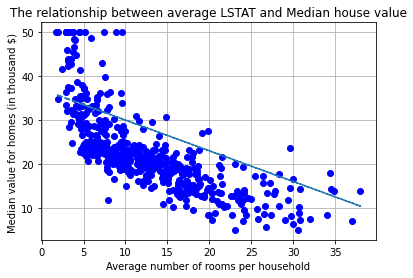

In [24]:
beta0, beta1, min_loss = fit_approx_max(x, y)
# print(min_loss)
# xplt = np.array([1, 5])
print(beta0)
print(beta1)
print(min_loss)
y = df['PRICE'].values
x = df['LSTAT'].values
yplt = beta1*x + beta0
plt.title("The relationship between average LSTAT and Median house value")
plt.grid(visible = True)
plt.plot(x,y,'bo')
plt.plot(x, yplt,'--')
plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 
plt.show()

Use your algorithm to obtain 3 different linear fits for `PRICE` with predictor variable `LSTAT`, one for squared loss, one for $\ell_1$ loss, and one for $\ell_\infty$ loss. Plot the linear fits (along with the data scatter plot) on a single figure and use a legend to indicate which fit corresponds to which loss.

Randomized combination of beta0 and beta1 and Squared diff
34.0
-0.9000000000000323
19540.082422999883
Randomized combination of beta0 and beta1 and abs diff
31.0
-0.8000000000000327
2163.5600000000027
Randomized combination of beta0 and beta1 and max abs diff
37.0
-0.700000000000033
19.671000000000316


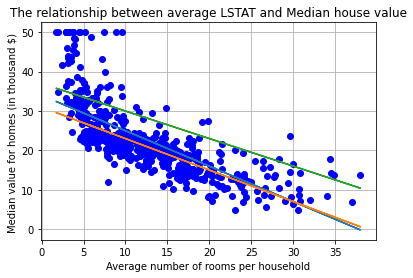

In [25]:
# Combine three graphs together
beta0, beta1, min_loss = fit_approx(x,y)
beta0_l1, beta1_l1, min_loss_l1 = fit_approx_l1(x, y)
beta0_max, beta1_max, min_loss_max = fit_approx_max(x, y)

print("Randomized combination of beta0 and beta1 and Squared diff")
print(beta0)
print(beta1)
print(min_loss)

print("Randomized combination of beta0 and beta1 and abs diff")
print(beta0_l1)
print(beta1_l1)
print(min_loss_l1)

print("Randomized combination of beta0 and beta1 and max abs diff")
print(beta0_max)
print(beta1_max)
print(min_loss_max)

y = df['PRICE'].values
x = df['LSTAT'].values

yplt = beta1*x + beta0
yplt_l1 = beta1_l1*x + beta0_l1
yplt_max = beta1_max*x + beta0_max

plt.title("The relationship between average LSTAT and Median house value")
plt.grid(visible = True)
plt.plot(x,y,'bo')

plt.plot(x, yplt,'-')
plt.plot(x, yplt_l1,'-')
plt.plot(x, yplt_max,'-')

plt.xlabel('Average number of rooms per household') 
plt.ylabel('Median value for homes (in thousand $) ') 
plt.show()